In [1]:
import sys
sys.path.append("../")

from utility.potential import *
from utility.plotting import *
from utility.units import *

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre
from split_op import Grid
import scipy.optimize as opt

r_grid = Grid.linear_continuos("r", 50 / 1024, 50, 300, 0)
r_points = np.array(r_grid.points())

x, weights = roots_legendre(100)
polar_points = np.flip(np.arccos(x))
weights = np.flip(weights)

polar_grid = Grid.custom("polar", polar_points, weights, 1)

PATH = "../potentials/"
retrive = PotentialRetriever(r_grid, polar_grid, PATH)

Intermolecular potential

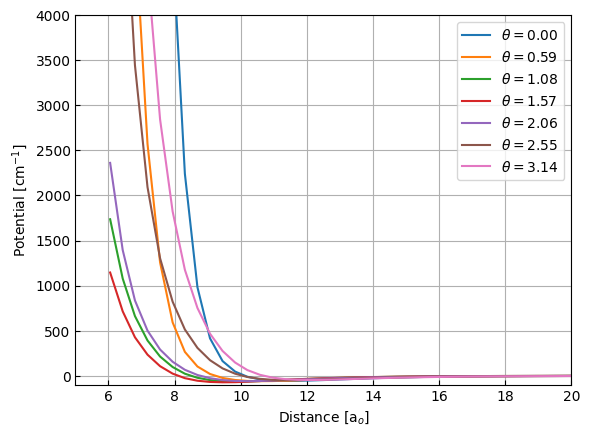

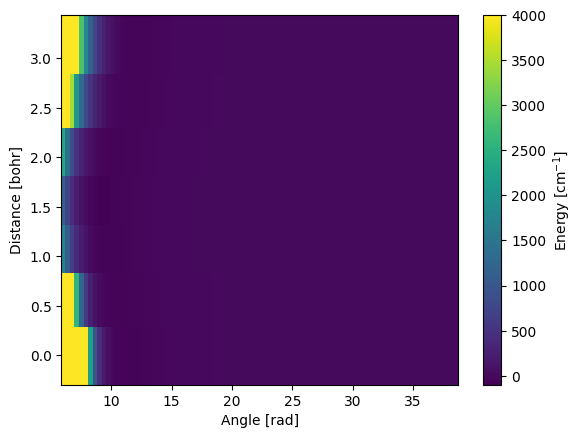

In [2]:
potential = load_from_file(PATH, "potential.dat")

fig, ax = plot()
for i in range(0, len(potential.polar)):
    ax.plot(potential.radial, potential.values[:, i] / CM_INV, label = fr"$\theta = {potential.polar[i]:.2f}$")

ax.legend()
ax.set_xlim(5, 20)
ax.set_ylim(-100, 4000)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"Potential [cm$^{-1}$]")
plt.show(ax)

fig, ax = plt.subplots()
cs = ax.pcolor(potential.radial, potential.polar, potential.values.T / CM_INV, vmax = 4000, vmin = -100)

ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [bohr]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"Energy [cm$^{-1}$]");

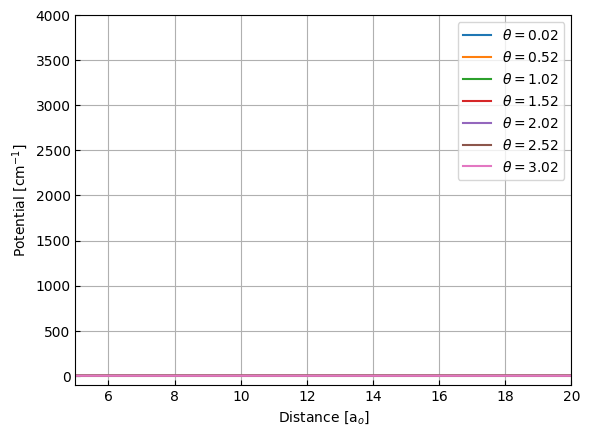

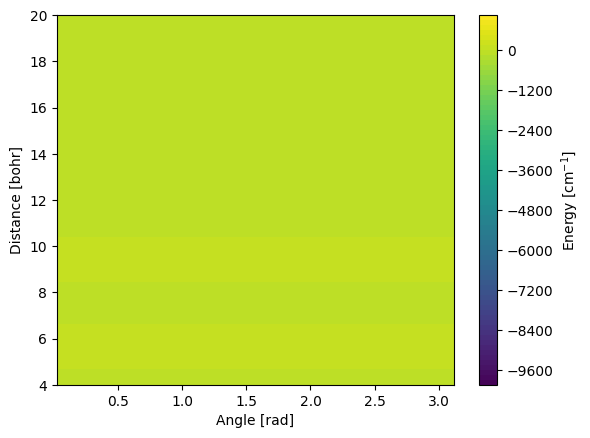

In [3]:
potential = retrive.reload_interpolated("potential.dat", is_gamma = False)

fig, ax = plot()
for i in range(0, len(potential.polar), 16):
    ax.plot(potential.radial, potential.values[:, i] / CM_INV, label=fr"$\theta = {potential.polar[i]:.2f}$")
ax.legend()
ax.set_xlim(5, 20)
ax.set_ylim(-100, 4000)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"Potential [cm$^{-1}$]")
plt.show(ax)


values = np.clip(potential.values, -10000 * CM_INV, 1000 * CM_INV)
fig, ax = plt.subplots()
cs = ax.contourf(potential.polar, potential.radial, values / CM_INV, levels=100)
ax.set_ylim(4, 20)

ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [bohr]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"Energy [cm$^{-1}$]")
fig.savefig("../plots/potential_standard.pdf");

XPi Sigma

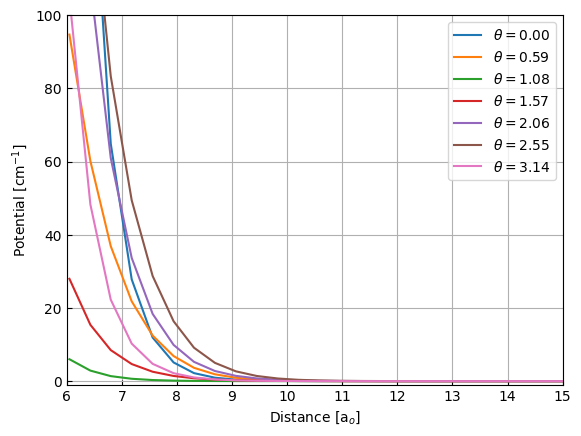

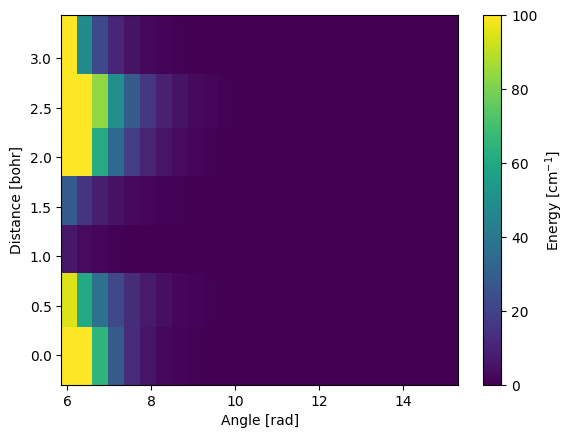

In [4]:
potential = load_from_file(PATH, "XPi_gamma.dat")

fig, ax = plot()
for i in range(0, len(potential.polar)):
    ax.plot(potential.radial, potential.values[:, i] / CM_INV, label = fr"$\theta = {potential.polar[i]:.2f}$")

ax.legend()
ax.set_ylim(-1, 100)
ax.set_xlim(6, 15)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"Potential [cm$^{-1}$]")

fig, ax = plt.subplots()
cs = ax.pcolor(potential.radial, potential.polar, potential.values.T / CM_INV, vmax = 100, vmin = 0)

ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [bohr]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"Energy [cm$^{-1}$]");

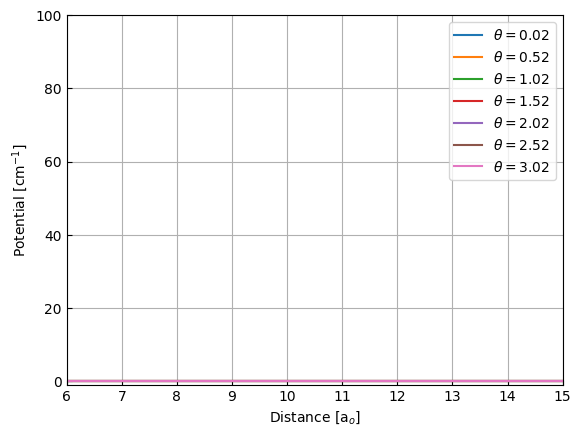

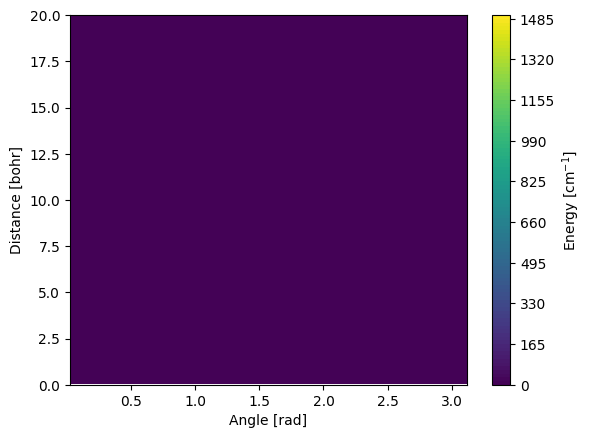

In [6]:
potential = retrive.reload_interpolated("XPi_gamma.dat", is_gamma = True)

fig, ax = plot()
for i in range(0, len(potential.polar), 16):
    ax.plot(potential.radial, potential.values[:, i] / CM_INV, label=fr"$\theta = {potential.polar[i]:.2f}$")
ax.legend()
ax.set_ylim(-1, 100)
ax.set_xlim(6, 15)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"Potential [cm$^{-1}$]")
plt.show(ax)


values = np.clip(potential.values, -1 * CM_INV, 1500 * CM_INV)
fig, ax = plt.subplots()
cs = ax.contourf(potential.polar, potential.radial, values / CM_INV, levels=100)
ax.set_ylim(0, 20)

ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [bohr]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"Energy [cm$^{-1}$]")
fig.savefig("../plots/potential_standard.pdf");

B sigma

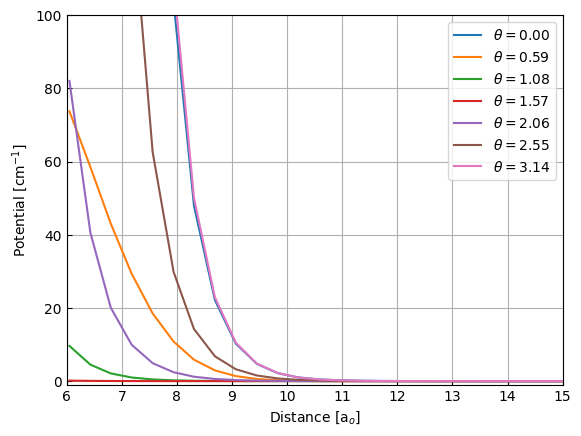

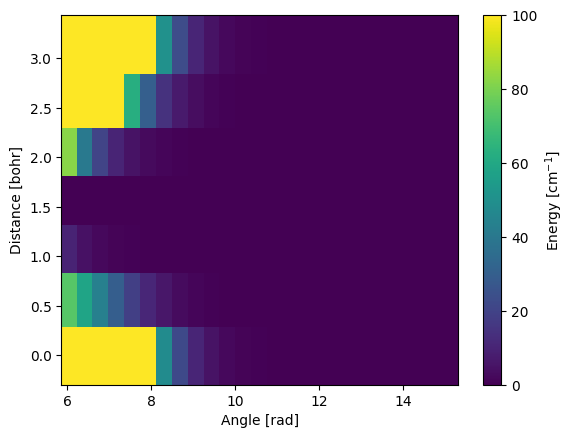

In [57]:
potential = load_from_file(PATH, "BSigma_gamma.dat")

fig, ax = plot()
for i in range(0, len(potential.polar)):
    ax.plot(potential.radial, potential.values[:, i] / CM_INV, label = fr"$\theta = {potential.polar[i]:.2f}$")

ax.legend()
ax.set_ylim(-1, 100)
ax.set_xlim(6, 15)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"Potential [cm$^{-1}$]")

fig, ax = plt.subplots()
cs = ax.pcolor(potential.radial, potential.polar, potential.values.T / CM_INV, vmax = 100, vmin = 0)

ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [bohr]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"Energy [cm$^{-1}$]");

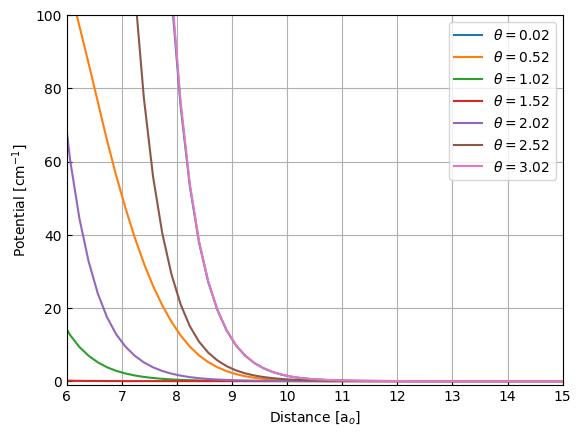

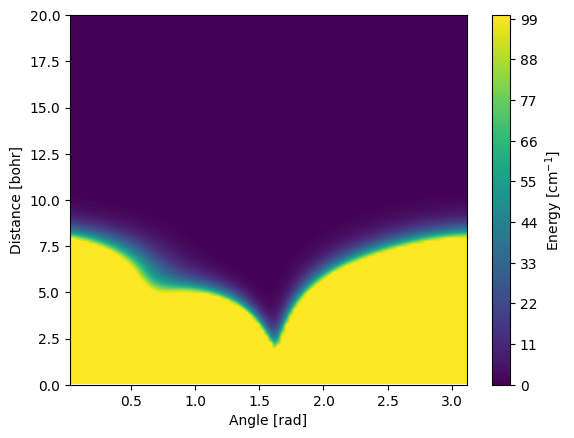

In [59]:
potential = retrive.reload_interpolated("BSigma_gamma.dat", is_gamma = True, kx = 5, ky = 5)

fig, ax = plot()
for i in range(0, len(potential.polar), 16):
    ax.plot(potential.radial, potential.values[:, i] / CM_INV, label=fr"$\theta = {potential.polar[i]:.2f}$")
ax.legend()

ax.set_ylim(-1, 100)
ax.set_xlim(6, 15)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"Potential [cm$^{-1}$]")
plt.show(ax)

values = np.clip(potential.values, -1 * CM_INV, 100 * CM_INV)
fig, ax = plt.subplots()
cs = ax.contourf(potential.polar, potential.radial, values / CM_INV, levels=100)
ax.set_ylim(0, 20)

ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [bohr]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"Energy [cm$^{-1}$]")
fig.savefig("../plots/potential_standard.pdf");

A Pi

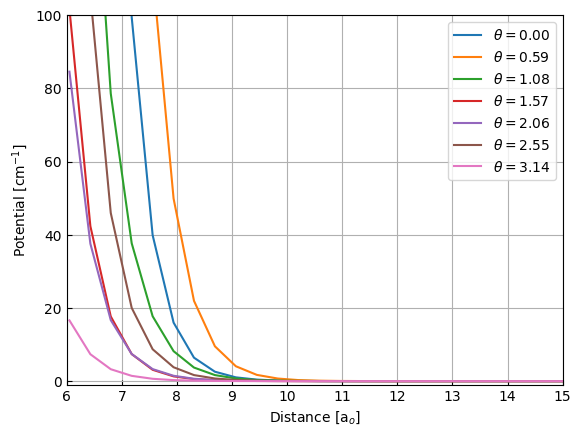

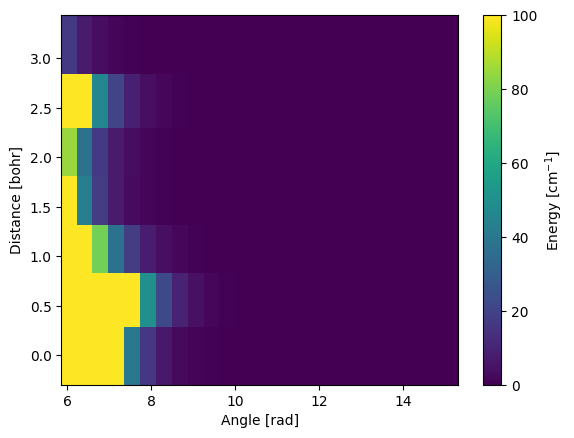

In [60]:
potential = load_from_file(PATH, "APi_gamma.dat")

fig, ax = plot()
for i in range(0, len(potential.polar)):
    ax.plot(potential.radial, potential.values[:, i] / CM_INV, label = fr"$\theta = {potential.polar[i]:.2f}$")

ax.legend()
ax.set_ylim(-1, 100)
ax.set_xlim(6, 15)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"Potential [cm$^{-1}$]")

fig, ax = plt.subplots()
cs = ax.pcolor(potential.radial, potential.polar, potential.values.T / CM_INV, vmax = 100, vmin = 0)

ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [bohr]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"Energy [cm$^{-1}$]");

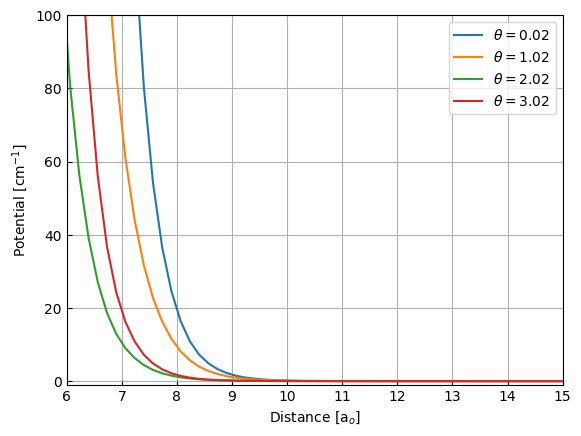

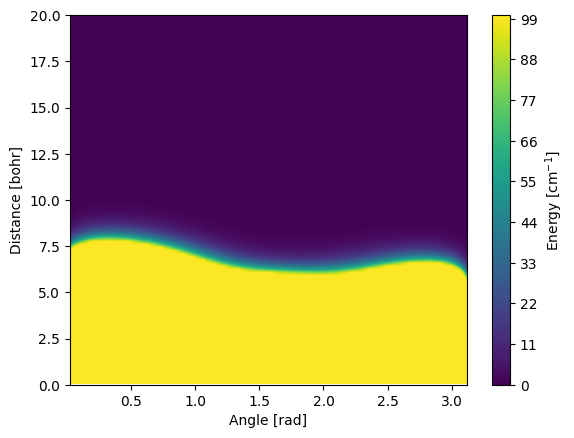

In [62]:
potential = retrive.reload_interpolated("APi_gamma.dat", is_gamma = True, kx = 5, ky = 5)

fig, ax = plot()
for i in range(0, len(potential.polar), 32):
    ax.plot(potential.radial, potential.values[:, i] / CM_INV, label=fr"$\theta = {potential.polar[i]:.2f}$")
ax.legend()
ax.set_ylim(-1, 100)
ax.set_xlim(6, 15)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"Potential [cm$^{-1}$]")
plt.show(ax)


values = np.clip(potential.values, -1 * CM_INV, 100 * CM_INV)
fig, ax = plt.subplots()
cs = ax.contourf(potential.polar, potential.radial, values / CM_INV, levels=100)
ax.set_ylim(0, 20)

ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [bohr]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"Energy [cm$^{-1}$]")
fig.savefig("../plots/potential_standard.pdf");

# Fitting potential

In [24]:
def fit_potential(r_theta, oc_bond, cs_bond, d6_o, d6_c, d6_s, re_o, re_c, re_s, sigma):
    potential = ForceField(oc_bond, cs_bond, d6_o, d6_c, d6_s, re_o, re_c, re_s, sigma)

    return potential.value(1 / r_theta[0], r_theta[1])

potential = load_from_file("../potentials/", "potential.dat")

radial = potential.radial[10:]
polar = potential.polar
pot = potential.values[10:, :]

radial_mesh, polar_mesh = np.meshgrid(radial, polar, indexing="ij")

p0 = (2.96876583, 2.178102798, 
      6.2e7, 6.2e7, 6.2e7, 
      170, 170, 170, 
      0.66656416032193)
p, err = opt.curve_fit(fit_potential, (1 / radial_mesh.ravel(), polar_mesh.ravel()), pot.ravel(), p0,
                       bounds = ((0, 0, 0, 0, 0, 0, 0, 0, -np.inf), np.inf))
print(p)

[1.68136770e+00 2.76987639e+00 1.42041331e+07 9.92743962e+07
 1.45642642e+08 1.19168908e-02 2.64214004e+02 2.51866925e+02
 9.31398178e+01]


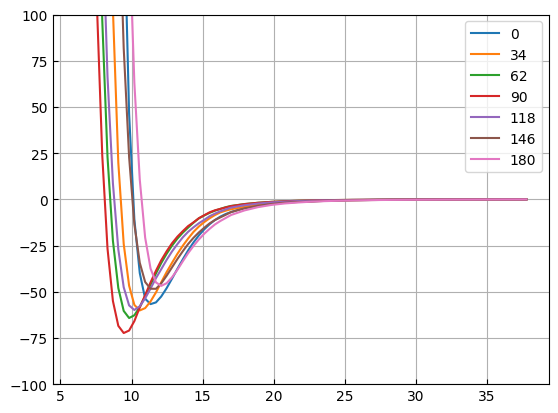

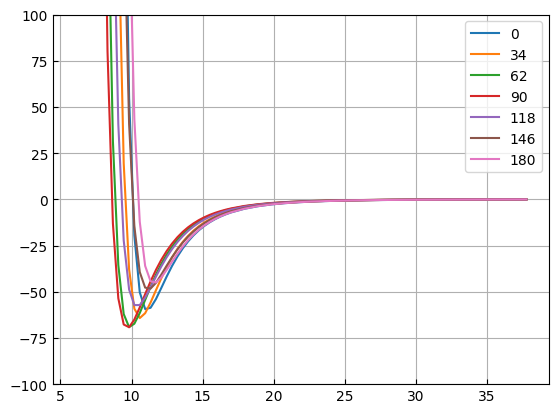

In [25]:
potential = load_from_file("../potentials/", "potential.dat")
radial_mesh, polar_mesh = np.meshgrid(potential.radial, potential.polar, indexing="ij")
polar_label = list(map(lambda x: f"{x:.0f}", potential.polar * 180 / np.pi))

fig, ax = plot()
ax.plot(potential.radial, potential.values / CM_INV, label = polar_label)
ax.set_ylim(-100, 100)
ax.legend()

fitted = fit_potential((1 / radial_mesh, polar_mesh), *p) / CM_INV
fig, ax = plot()
ax.plot(potential.radial, fitted, label = polar_label)
ax.set_ylim(-100, 100)
ax.legend();

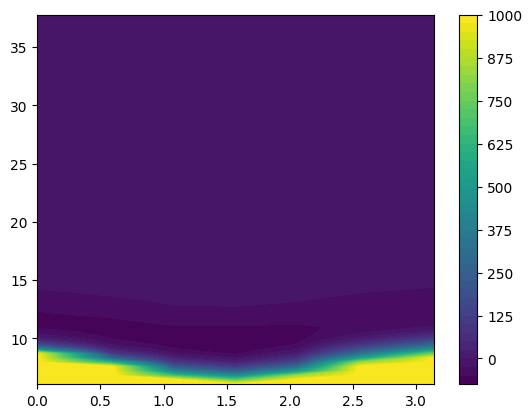

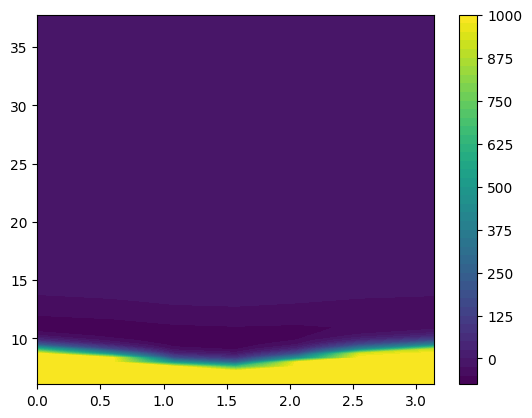

In [26]:
potential = load_from_file("../potentials/", "potential.dat")
radial_mesh, polar_mesh = np.meshgrid(potential.radial, potential.polar, indexing="ij")
polar_label = list(map(lambda x: f"{x:.0f}", potential.polar * 180 / np.pi))
potential.values = np.clip(potential.values, -1000 * CM_INV, 1000 * CM_INV)

fig, ax = plt.subplots()
CS = ax.contourf(potential.polar, potential.radial, potential.values / CM_INV, levels=50)
cbar = fig.colorbar(CS)

fitted = fit_potential((1 / radial_mesh, polar_mesh), *p)
fitted = np.clip(fitted, -1000 * CM_INV, 1000 * CM_INV)

fig, ax = plt.subplots()
CS = ax.contourf(potential.polar, potential.radial, fitted / CM_INV, levels=50)
cbar = fig.colorbar(CS)

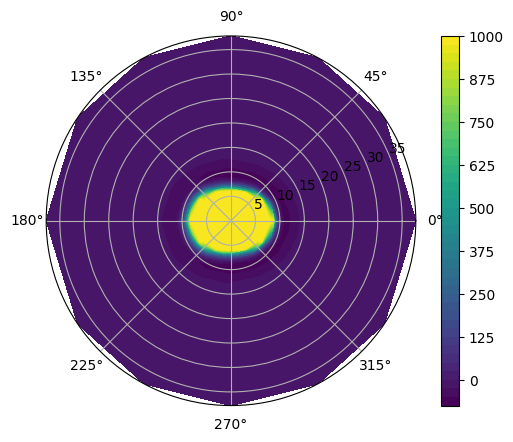

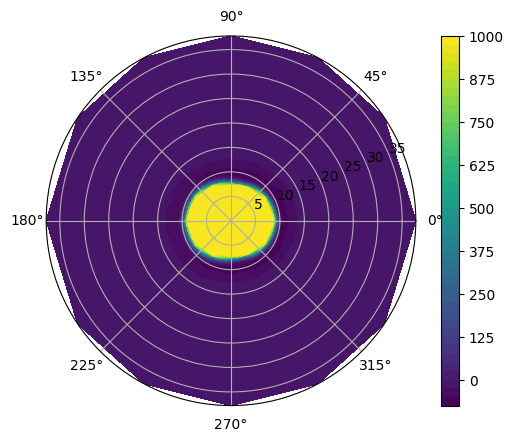

In [27]:
max_val = 1000
potential = load_from_file("../potentials/", "potential.dat")
radial_mesh, polar_mesh = np.meshgrid(potential.radial, potential.polar, indexing="ij")
polar_label = list(map(lambda x: f"{x:.0f}", potential.polar * 180 / np.pi))

potential.values = np.clip(potential.values, -1000 * CM_INV, max_val * CM_INV)
potential_ext = into_polar(potential, max_val * CM_INV)

fig, ax = plt.subplots(subplot_kw=dict(projection="polar"))
CS = ax.contourf(potential_ext.polar, potential_ext.radial, potential_ext.values / CM_INV, levels=50)
cbar = fig.colorbar(CS)

fitted = fit_potential((1 / radial_mesh, polar_mesh), *p)
fitted = np.clip(fitted, -1000 * CM_INV, 1000 * CM_INV)
fitted = into_polar(PotentialArray(potential.radial, potential.polar, fitted), max_val * CM_INV)

fig, ax = plt.subplots(subplot_kw=dict(projection="polar"))
CS = ax.contourf(fitted.polar, fitted.radial, fitted.values / CM_INV, levels=50)
cbar = fig.colorbar(CS)

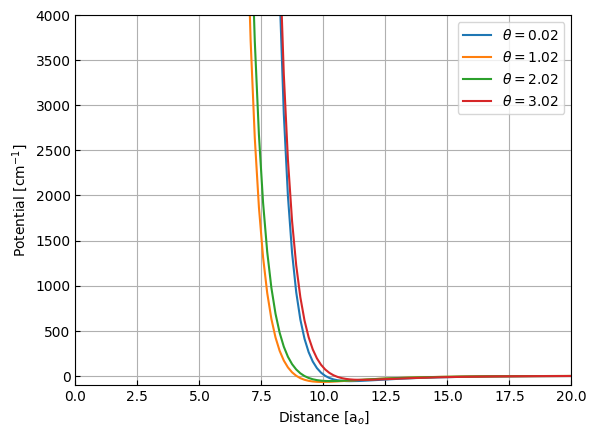

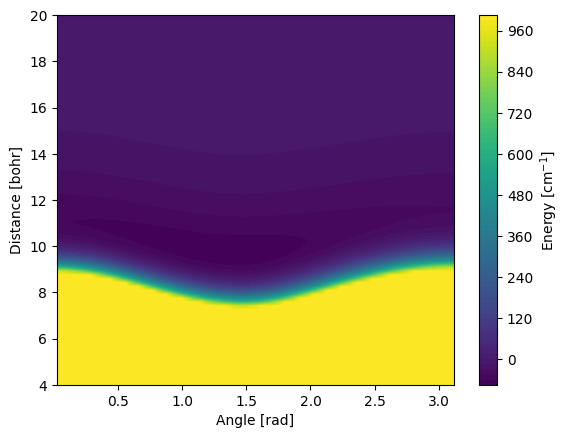

In [29]:
radial_mesh, polar_mesh = np.meshgrid(r_points, polar_points, indexing="ij")
fitted = np.array(fit_potential((1 / radial_mesh, polar_mesh), *p))
potential = PotentialArray(r_points, polar_points, fitted)

fig, ax = plot()
for i in range(0, len(potential.polar), 32):
    ax.plot(potential.radial, potential.values[:, i] / CM_INV, label=fr"$\theta = {potential.polar[i]:.2f}$")
ax.legend()
ax.set_xlim(0, 20)
ax.set_ylim(-100, 4000)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"Potential [cm$^{-1}$]")

values = np.clip(potential.values, -10000 * CM_INV, 1000 * CM_INV)
fig, ax = plt.subplots()
cs = ax.contourf(potential.polar, potential.radial, values / CM_INV, levels=100)
ax.set_ylim(4, 20)

ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [bohr]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"Energy [cm$^{-1}$]")
fig.savefig("../plots/potential_fitted.pdf");

# Gamma potential interpolation test

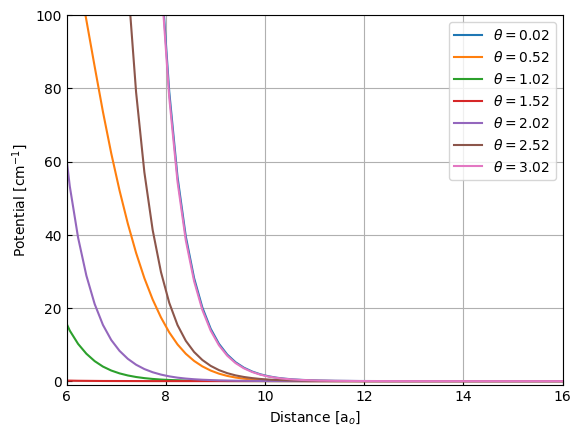

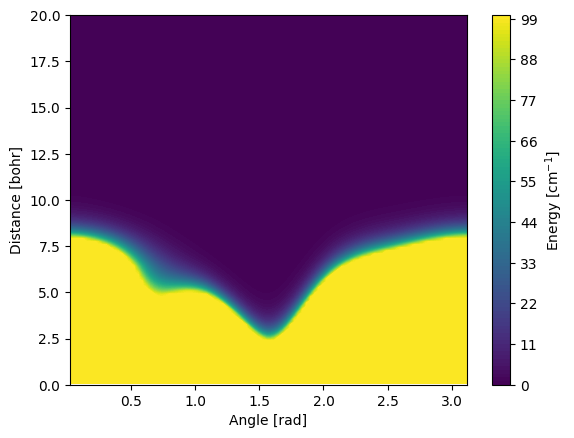

In [83]:
from scipy.interpolate import CubicSpline

power = 16

potential = retrive.get_extended("BSigma_gamma.dat")

interp_polar = np.zeros((potential.radial.shape[0], polar_grid.nodes_no()))
for i in range(len(potential.radial)):
    interpolation = CubicSpline(potential.polar, np.power(potential.values[i, :], 1 / power), bc_type="clamped")

    interp_polar[i, :] = interpolation(polar_points)

interp_2d = np.zeros((r_grid.nodes_no(), polar_grid.nodes_no()))
for i in range(polar_grid.nodes_no()):
    interpolation = CubicSpline(potential.radial, interp_polar[:, i])

    interp_2d[:, i] = np.power(interpolation(r_points), power)

potential = PotentialArray(r_points, polar_points, interp_2d)

fig, ax = plot()
for i in range(0, len(potential.polar), 16):
    ax.plot(potential.radial, potential.values[:, i] / CM_INV, label=fr"$\theta = {potential.polar[i]:.2f}$")
ax.legend()
ax.set_xlim(6, 16)
ax.set_ylim(-1, 100)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"Potential [cm$^{-1}$]")
plt.show(ax)


values = np.clip(potential.values, -1 * CM_INV, 100 * CM_INV)
fig, ax = plt.subplots()
cs = ax.contourf(potential.polar, potential.radial, values / CM_INV, levels=100)
ax.set_ylim(0, 20)

ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [bohr]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"Energy [cm$^{-1}$]")
fig.savefig("../plots/potential_standard.pdf");

# Gamma potential fit tests

In [1]:
potential = load_from_file(PATH, "XPi_gamma.dat")

fig, ax = plot()
ax.plot(potential.radial, potential.values[:, 0], label=fr"$\theta = {potential.polar[0]:.2f}$")
ax.plot(potential.radial, (4.05 / potential.radial) ** 16)

ax.legend()
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel("Potential [a.u.]")
plt.show(ax)


NameError: name 'load_from_file' is not defined

In [36]:
from dataclasses import dataclass

@dataclass
class GammaPotential:
    c6_0: float
    c6_1: float
    c6_2: float
    c6_3: float
    c6_4: float
    c12_0: float
    c12_1: float
    c12_2: float
    c12_3: float
    c12_4: float

    @staticmethod
    def default():
        return GammaPotential(1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

    def value(self, r, theta):
        return self.c6_0 / r ** 6 + self.c12_0 / r ** 12 \
            + (self.c6_1 / r ** 6 + self.c12_1 / r ** 12) * np.cos(theta) ** 2 \
            + (self.c6_3 / r ** 6 + self.c12_3 / r ** 12) * np.sin(theta / 2) \
            + (self.c6_4 / r ** 6 + self.c12_4 / r ** 12) * np.sin(np.pi / 2 - theta / 2)


In [37]:
import scipy.optimize as opt

def fit_gamma(r_theta, c6_0, c6_1, c6_2, c6_3, c6_4, c12_0, c12_1, c12_2, c12_3, c12_4):
    potential = GammaPotential(c6_0, c6_1, c6_2, c6_3, c6_4, c12_0, c12_1, c12_2, c12_3, c12_4)

    return potential.value(1 / r_theta[0], r_theta[1])

theta, r, pot = load_from_file("../potentials/", "XPi_gamma.dat")
theta = np.array(theta)
r = np.array(r)
pot = np.array(pot)

r = r[0:]
pot = pot[:, 0:]

theta_mesh, r_mesh = np.meshgrid(theta, r, indexing="ij")

p0 = (3.32159701e-01, 3.02708919e+01, 1.19336306e-01, 4.21472629e+00, 9.63138529e+00, 
      1.68055282e+02, 2.49460119e+02, 3.75080310e+00, 1.38211091e+02, 1.25940254e+02)
p, err = opt.curve_fit(fit_gamma, (1 / r_mesh.ravel(), theta_mesh.ravel()), pot.ravel(), p0,
                       bounds = ((0, 0, 0, 0, 0, 0, 0, 0, 0, 0), np.inf))
print(p)

[3.32159701e-01 3.02708919e+01 1.19336306e-01 4.21472629e+00
 9.63138529e+00 1.68055282e+02 2.49460119e+02 3.75080310e+00
 1.38211091e+02 1.25940254e+02]


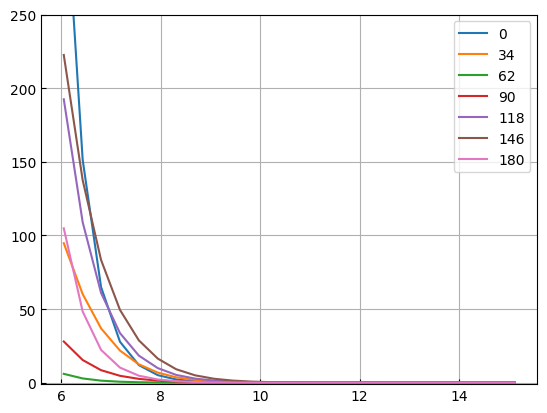

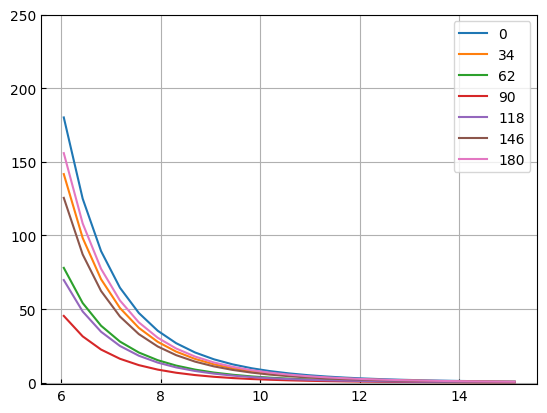

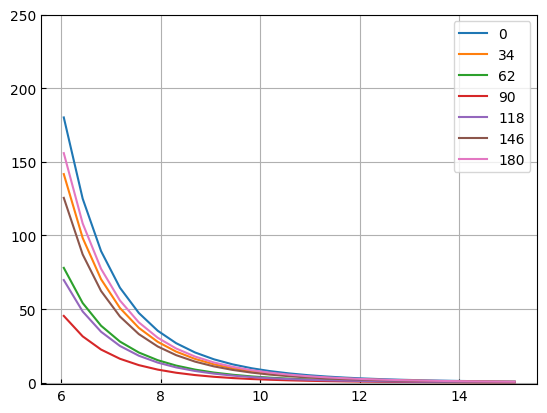

In [38]:
theta, r, pot = load_from_file("../potentials/", "XPi_gamma.dat")
theta = np.array(theta)
r = np.array(r)
pot = np.array(pot)

theta_label = list(map(lambda x: f"{x:.0f}", theta * 180 / np.pi))
theta_mesh, r_mesh = np.meshgrid(theta, r, indexing="ij")

potential = np.clip(pot / CM_INV, -1, 1000)
fig, ax = utility.plot()
ax.plot(r, potential.T, label=theta_label)
ax.set_ylim(-1, 250)
ax.legend()

potential = np.clip(fit_gamma((1 / r_mesh, theta_mesh), *p) / CM_INV, -np.inf, np.inf)
fig, ax = utility.plot()
ax.plot(r, potential.T, label=theta_label)
ax.set_ylim(-1, 250)
ax.legend();

potential = np.clip(fit_gamma((1 / r_mesh, theta_mesh), *p0) / CM_INV, -np.inf, np.inf)
fig, ax = utility.plot()
ax.plot(r, potential.T, label=theta_label)
ax.set_ylim(-1, 250)
ax.legend();

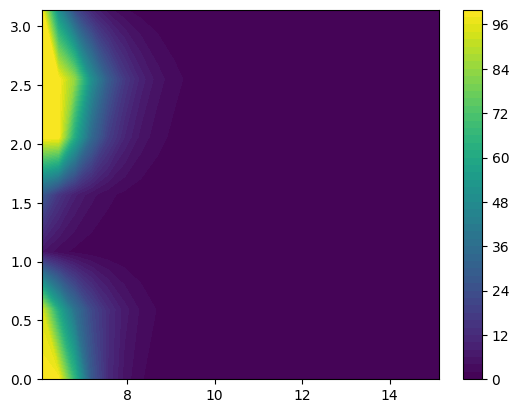

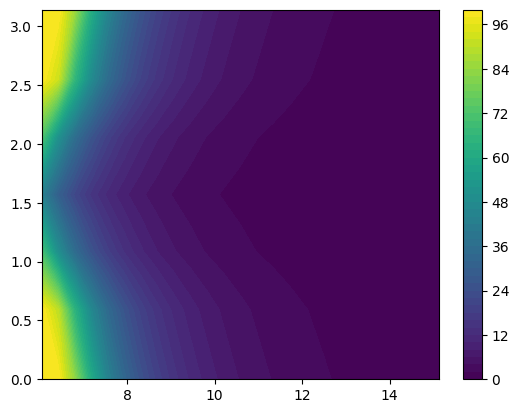

In [24]:
theta, r, pot = load_from_file("../potentials/", "XPi_gamma.dat")
theta = np.array(theta)
r = np.array(r)
pot = np.array(pot)

theta_label = list(map(lambda x: f"{x:.0f}", theta * 180 / np.pi))
theta_mesh, r_mesh = np.meshgrid(theta, r, indexing="ij")
potential = np.clip(pot / CM_INV, -1000, 100)

fig, ax = plt.subplots()
CS = ax.contourf(r, theta, potential, levels=50)
cbar = fig.colorbar(CS)

potential = np.clip(fit_gamma((1 / r_mesh, theta_mesh), *p) / CM_INV, -1000, 100)
fig, ax = plt.subplots()
CS = ax.contourf(r, theta, potential, levels=50)
cbar = fig.colorbar(CS)

[3.44818233e+00 9.94510779e-01 1.80010756e+05 1.48339297e+09
 1.84386074e+00]


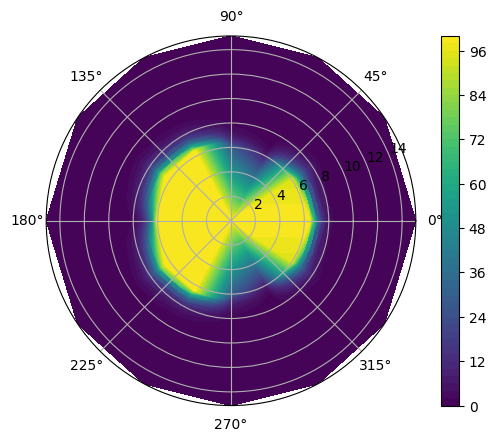

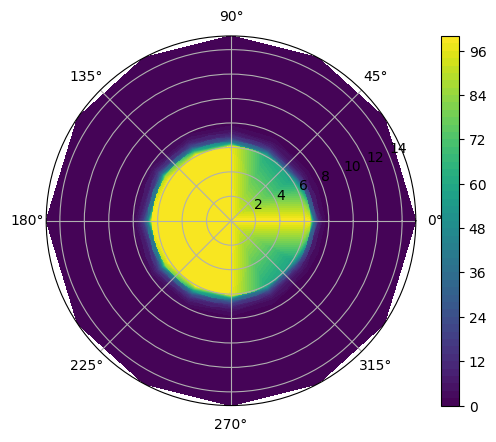

In [310]:
theta, r, pot = load_from_file("../potentials/", "XPi_gamma.dat")
theta = np.array(theta)
r = np.array(r)
pot = np.array(pot)

theta_label = list(map(lambda x: f"{x:.0f}", theta * 180 / np.pi))
theta_mesh, r_mesh = np.meshgrid(theta, r, indexing="ij")
potential = np.clip(pot / CM_INV, -1, 100)
theta_mod, r_mod, pot_mod = into_polar(theta, r, potential, 100)

fig, ax = plt.subplots(subplot_kw=dict(projection="polar"))
CS = ax.contourf(theta_mod, r_mod, pot_mod.T, levels=50)
cbar = fig.colorbar(CS)

print(p)
potential = np.clip(fit_gamma((1 / r_mesh, theta_mesh), *p) / CM_INV, -1, 100)
theta_mod, r_mod, pot_mod = into_polar(theta, r, potential, 100)

fig, ax = plt.subplots(subplot_kw=dict(projection="polar"))
CS = ax.contourf(theta_mod, r_mod, pot_mod.T, levels=50)
cbar = fig.colorbar(CS)

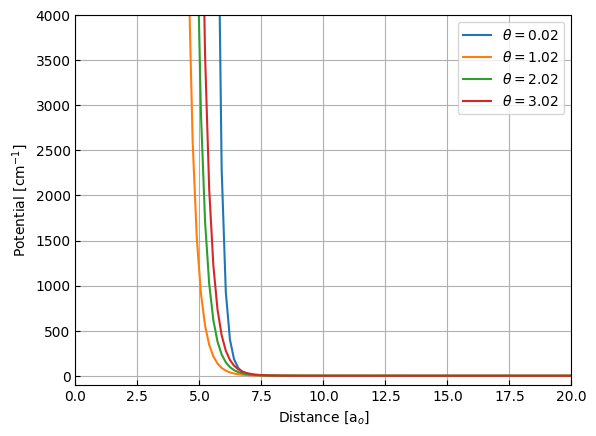

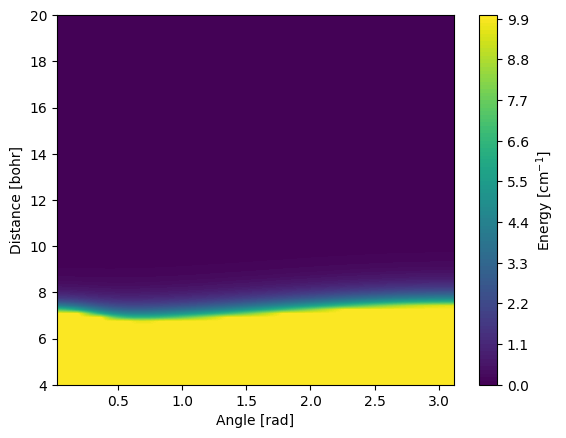

In [312]:
r_mesh, theta_mesh = np.meshgrid(r_points, polar_points, indexing="ij")

V_grid = fit_gamma((1 / r_mesh, theta_mesh), *p) / CM_INV

fig, ax = utility.plot()
for i in range(0, len(polar_points), 32):
    ax.plot(r_points, V_grid[:, i], label=r"$\theta = {:.2f}$".format(polar_points[i]))
ax.legend()
ax.set_xlim(0, 20)
ax.set_ylim(-100, 4000)
ax.set_xlabel(r"Distance [a$_o$]")
ax.set_ylabel(r"Potential [cm$^{-1}$]")
plt.show(ax)


np.clip(V_grid, -1000, 10, out=V_grid)
fig, ax = plt.subplots()
cs = ax.contourf(polar_points, r_points, V_grid, levels=100)
ax.set_ylim(4, 20)

ax.set_xlabel(r"Angle [rad]")
ax.set_ylabel(r"Distance [bohr]")
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r"Energy [cm$^{-1}$]")
fig.savefig("../plots/potential_standard.pdf")